## Data preprocessing

We will start the project by taking a look at the variables that we have in our dataset, and performing data cleaning as neccessary.  
Since our problem is one of optimization, each decision we take in cleaning we may want to reconsider later on, and we will document them well to be able to come back to them and take a different path later on.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
%matplotlib inline

In [69]:
diamonds = pd.read_csv('../input-data/diamonds_train.csv')
# Let's import the test dataset as well
diam_test = pd.read_csv('../input-data/diamonds_test.csv')

In [28]:
# With out dataset loaded, let us take a look at it.
display(diamonds.head())
display(diamonds.shape)
display(diamonds.columns)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


(40345, 11)

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [29]:



display(diam_test.head())
diam_test.shape

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24


(13449, 10)

Here is a description of each variable:

- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

From these descriptions and the dataframes, we notice a couple of things:

- A number of variables are ordinal i.e. categorical variables with an order. 
- Other variables (carat, depth, table, and xyz) are continous

In [30]:
diamonds.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [31]:
# We have three categorical variables that we have to clean

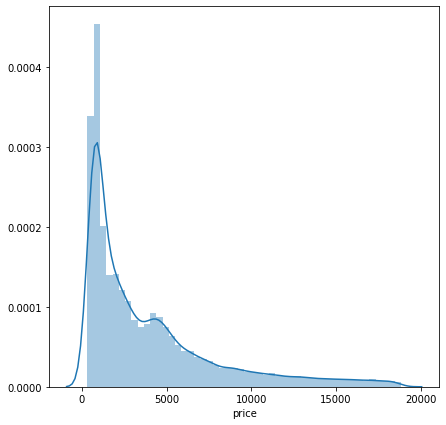

In [32]:
# One initial step is to take a look at the distribution of our outcome variable.
plt.figure(figsize=(7,7))
sns.distplot(diamonds.price)

Clearly it is not distributed normally, although the left side looks a bit like a normal distribution.

In [33]:
ce_binary = ce.BinaryEncoder(cols = ['color'])
X = diamonds.drop(columns='price')
y = diamonds.price

In [34]:
#ce_binary.fit_transform(X, y)

We can check for missing data in the dataset with the isnull() function.

In [35]:
diamonds.isnull().sum() #No missing data

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [36]:
diamonds.cut.unique()

array(['Premium', 'Ideal', 'Very Good', 'Fair', 'Good'], dtype=object)

In [37]:
# Let us refactor the cut column into a integer.
cut_nums = {
    "Fair":0, 
    "Good":1, 
    "Very Good":2, 
    "Premium":3, 
    "Ideal":4
}
diamonds.cut.replace(cut_nums) 

0        3
1        4
2        4
3        4
4        4
        ..
40340    4
40341    4
40342    3
40343    4
40344    2
Name: cut, Length: 40345, dtype: int64

In [38]:
# With this working, we can export it to a Cleaner_object

In [39]:
# For the letters, we can also use a ranking system, and put it into a cleaner.
letter_grades = sorted(diamonds.color.unique())
letter_ranks = {letter:rank for letter,rank in zip(letter_grades, range(len(letter_grades), 0, -1))}
letter_ranks

{'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}

In [40]:
diamonds.color.replace(letter_ranks).head() # We confirm it works correctly, and put the dict and code into the cleaner.

0    5
1    7
2    5
3    6
4    1
Name: color, dtype: int64

In [41]:
diamonds.clarity.unique()

array(['VS1', 'SI1', 'VVS2', 'SI2', 'VS2', 'IF', 'VVS1', 'I1'],
      dtype=object)

In [42]:
# We can do the same for clarity, and then we put it into the cleaner
clarity_str = "I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF"
clarity_list = ['VS1', 'SI1', 'VVS2', 'SI2', 'VS2', 'IF', 'VVS1', 'I1'] #clarity_str.split(',')
clarity_ranks = {str(c):str(rank) for c,rank in zip(clarity_list, range(len(clarity_list)))}
print(clarity_ranks)

{'VS1': '0', 'SI1': '1', 'VVS2': '2', 'SI2': '3', 'VS2': '4', 'IF': '5', 'VVS1': '6', 'I1': '7'}


In [43]:
diamonds['cut'] = diamonds['cut'].map(cut_nums)
# Replace color with with integers (ranked from worst to best)
diamonds['color'] = diamonds['color'].map(letter_ranks)
# Replace clarity with integers (ranked from worst to best)
diamonds['clarity'] = diamonds['clarity'].map(clarity_ranks)
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,3,5,0,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,4,7,1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,4,5,1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,4,6,2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,4,1,1,61.4,55.0,5.58,5.62,3.44,1276


In [44]:
# We can do the same for the test_dataset
diam_test['cut'] = diam_test['cut'].map(cut_nums)
# Replace color with with integers (ranked from worst to best)
diam_test['color'] = diam_test['color'].map(letter_ranks)
# Replace clarity with integers (ranked from worst to best)
diam_test['clarity'] = diam_test['clarity'].map(clarity_ranks)
diam_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,3,3,3,62.2,58.0,6.69,6.60,4.13
1,1,0.51,4,2,1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,3,4,1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,3,5,1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,4,5,1,61.8,55.0,5.27,5.22,3.24


We probably should have looked at the distributions before, but now that we are doing it, the picture is illuminating. 
Cut does not seem to be a very useful feature.

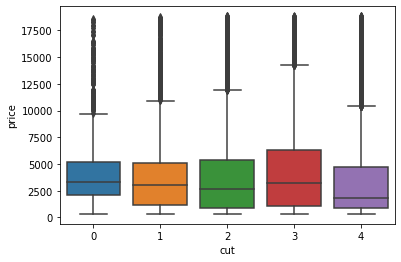

In [45]:

sns.boxplot(x=diamonds.cut, y=diamonds.price)

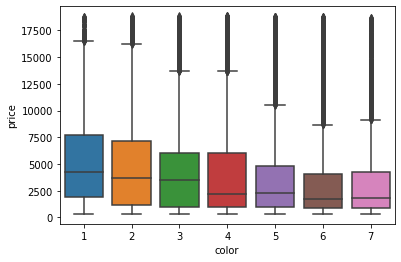

In [46]:
sns.boxplot(x=diamonds.color, y=diamonds.price)

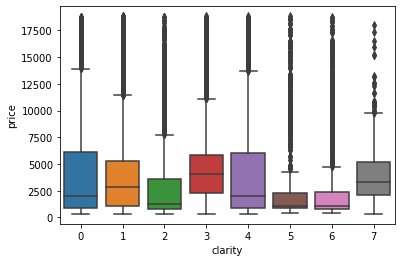

In [47]:
sns.boxplot(x=diamonds.clarity, y=diamonds.price)

We can export the datasets with the extra cleaning, to start experimenting with some ML algorithms.

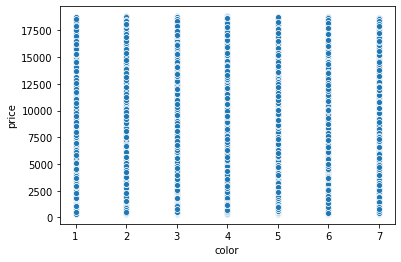

In [48]:
sns.scatterplot(x='color', y='price', data=diamonds)

In [49]:
#diamonds.to_csv('../cleaned-data/01-diamonds-train-cl.csv', index=False)

In [50]:
#diam_test.to_csv('../cleaned-data/01-diamonds-test-cl.csv', index=False)

## Approach 2

Instead of mapping cut, color and clarity to a linear scale, we could instead treat them as completely categorical variables, and turn them all into dummies. We can use the get_dummies function for this.

In [51]:
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,3,5,0,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,4,7,1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,4,5,1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,4,6,2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,4,1,1,61.4,55.0,5.58,5.62,3.44,1276


In [52]:
# We first turn the three columns to strings, so they are recognized by the get_dummies function
for e in ['cut', 'color', 'clarity']:
    diamonds[e] = diamonds[e].map(str)
diamonds_wdummies = pd.get_dummies(diamonds)
#display(diamonds_wdummies.head())
diamonds_dum_train = diamonds_wdummies.drop(columns='price')
diamonds_dum_train = pd.merge(diamonds_dum_train, diamonds_wdummies['price'], left_index=True, right_index=True)
diamonds_dum_train.head()

,id,carat,depth,table,x,y,z,cut_0,cut_1,cut_2,...,color_7,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,price
0,0,0.78,61.5,58.0,5.93,5.98,3.66,0,0,0,...,0,1,0,0,0,0,0,0,0,3446
1,1,0.31,60.8,56.0,4.37,4.32,2.64,0,0,0,...,1,0,1,0,0,0,0,0,0,732
2,2,0.30,62.3,54.0,4.30,4.34,2.69,0,0,0,...,0,0,1,0,0,0,0,0,0,475
3,3,1.04,62.0,58.0,6.54,6.46,4.03,0,0,0,...,0,0,0,1,0,0,0,0,0,9552
4,4,0.65,61.4,55.0,5.58,5.62,3.44,0,0,0,...,0,0,1,0,0,0,0,0,0,1276


In [53]:
for e in ['cut', 'color', 'clarity']:
    diam_test[e] = diam_test[e].map(str)
diam_test_wdummies = pd.get_dummies(diam_test)
diam_test_wdummies.head()
diamonds_dum_test = diam_test_wdummies
#diamonds_dum_test = pd.merge(diamonds_dum_test, diamonds_wdummies['price'], left_index=True, right_index=True)
diamonds_dum_test.head()

,id,carat,depth,table,x,y,z,cut_0,cut_1,cut_2,...,color_6,color_7,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7
0,0,1.10,62.2,58.0,6.69,6.60,4.13,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0.51,62.5,57.0,5.07,5.10,3.18,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,2.03,61.9,59.0,8.14,8.09,5.02,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,1.21,60.0,60.0,6.96,6.91,4.16,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,0.55,61.8,55.0,5.27,5.22,3.24,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [54]:
diamonds_dum_train.to_csv('../cleaned-data/02_diamonds_train_alldummies.csv', index=False)
diamonds_dum_test.to_csv('../cleaned-data/02_diamonds_test_alldummies.csv', index=False)

## Min-Max standardization

We can also apply min-max-stardization to the continous variables, to reduce the numerical complexity

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [56]:
pd.DataFrame(scaler.fit_transform(diamonds_wdummies))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.120582,0.513889,0.288462,0.552142,0.101528,0.454094,0.168676,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000025,0.022869,0.494444,0.250000,0.406890,0.073345,0.327543,0.021950,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000050,0.020790,0.536111,0.211538,0.400372,0.073684,0.333747,0.008055,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000074,0.174636,0.527778,0.288462,0.608939,0.109677,0.500000,0.498784,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000099,0.093555,0.511111,0.230769,0.519553,0.095416,0.426799,0.051360,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40340,0.999901,0.062370,0.525000,0.250000,0.473929,0.086927,0.392060,0.075147,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40341,0.999926,0.027027,0.522222,0.250000,0.409683,0.075382,0.338710,0.024599,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40342,0.999950,0.041580,0.513889,0.288462,0.436685,0.080475,0.359801,0.043088,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40343,0.999975,0.178794,0.505556,0.269231,0.613594,0.111375,0.500000,0.287885,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
diamonds2train = pd.read_csv('../input-data/diamonds_train.csv').drop(columns='id', axis=1)
diamonds2test = pd.read_csv('../input-data/diamonds_test.csv').drop(columns='id', axis=1)
display(diamonds2train.head())
display(diamonds2test.head())

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


,carat,cut,color,clarity,depth,table,x,y,z
0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24


In [58]:
scaler.fit_transform(diamonds_wdummies)

array([[0.00000000e+00, 1.20582121e-01, 5.13888889e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.47868332e-05, 2.28690229e-02, 4.94444444e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.95736665e-05, 2.07900208e-02, 5.36111111e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99950426e-01, 4.15800416e-02, 5.13888889e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99975213e-01, 1.78794179e-01, 5.05555556e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.68399168e-01, 5.66666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [59]:
# I have had some struggles with relative imports. 
import os
os.getcwd()

'/home/edu/Documents/1-projects-ironhack/project-5/predictingDiamondPrices/workflow'

In [60]:
os.chdir('../sourceCode/')

In [61]:
import cleaningFunctions as cln

In [62]:
abspath = os.path.abspath('1-preprocessing.ipynb')
dname = os.path.dirname(abspath)
os.chdir(dname)

In [63]:
os.getcwd()

'/home/edu/Documents/1-projects-ironhack/project-5/predictingDiamondPrices/sourceCode'

In [65]:
#cleaner = cln.CleanDiamonds(diamonds2train)

In [68]:
#diamonds2train.fit_transform()

# Approach 3: combination between dummies and categorical variables as integers

We saw from the boxplots that whereas color seems to have an association with price that is ordinal, cut and clarity do not show clear association. We can make color an int, and create dummies out of cut and clarity to reflect this.

In [73]:
# Reimporting since we changed things about the datasets
diamonds = pd.read_csv('../input-data/diamonds_train.csv')
diam_test = pd.read_csv('../input-data/diamonds_test.csv')

In [74]:
diamonds['color'] = diam_test['color'].map(letter_ranks)
diam_test['color'] = diam_test['color'].map(letter_ranks)

In [75]:
# We first turn the three columns to strings, so they are recognized by the get_dummies function
for e in ['cut', 'clarity']:
    diamonds[e] = diamonds[e].map(str)
diamonds_wdummies = pd.get_dummies(diamonds)
#display(diamonds_wdummies.head())
diamonds_dum_train = diamonds_wdummies.drop(columns='price')
diamonds_dum_train = pd.merge(diamonds_dum_train, diamonds_wdummies['price'], left_index=True, right_index=True)
diamonds_dum_train.head()

,id,carat,color,depth,table,x,y,z,cut_Fair,cut_Good,...,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0,0.78,3.0,61.5,58.0,5.93,5.98,3.66,0,0,...,0,0,0,0,0,1,0,0,0,3446
1,1,0.31,2.0,60.8,56.0,4.37,4.32,2.64,0,0,...,0,0,0,1,0,0,0,0,0,732
2,2,0.30,4.0,62.3,54.0,4.30,4.34,2.69,0,0,...,0,0,0,1,0,0,0,0,0,475
3,3,1.04,5.0,62.0,58.0,6.54,6.46,4.03,0,0,...,0,0,0,0,0,0,0,0,1,9552
4,4,0.65,5.0,61.4,55.0,5.58,5.62,3.44,0,0,...,0,0,0,1,0,0,0,0,0,1276


In [77]:
diamonds_dum_train.to_csv('../cleaned-data/07_diamonds_train_colorAsInt_othersAsDummies.csv', index=False)
diamonds_dum_test.to_csv('../cleaned-data/07_diamonds_test_colorAsInt_othersAsDummies.csv', index=False)